**Aim-** Use TensorFlow to build our first Sequential model.


In [2]:
import numpy as np
import pandas as pd

## Generate Dataset



In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=10, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

In [4]:
print(X.shape)
print(y.shape)

(100, 10)
(100,)


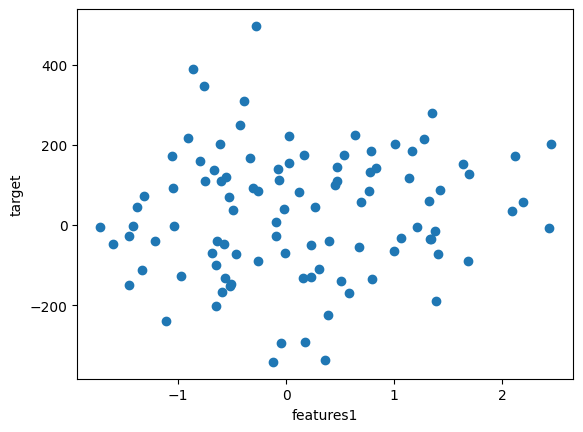

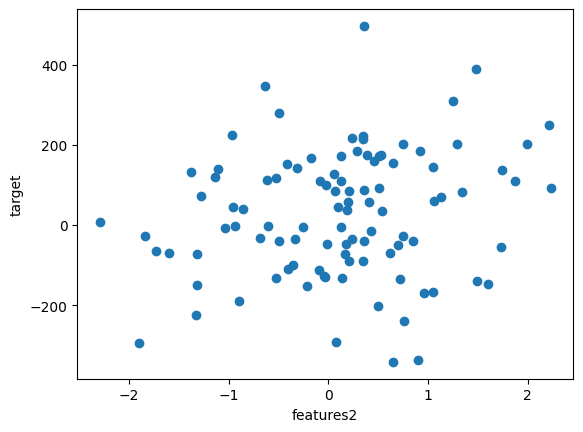

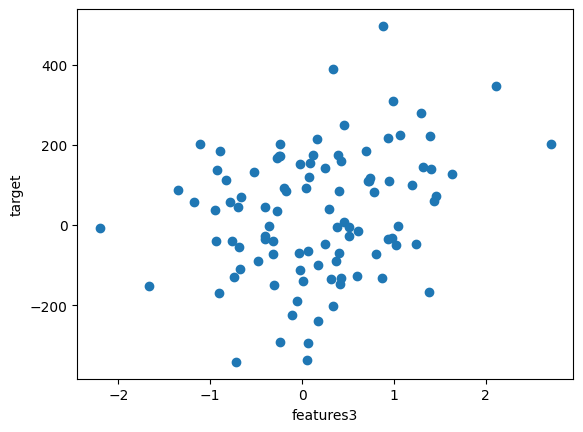

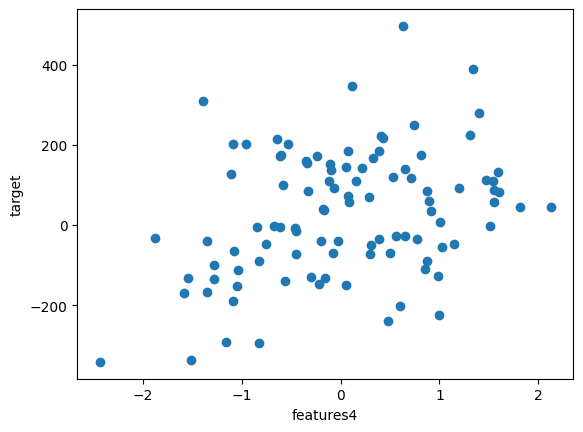

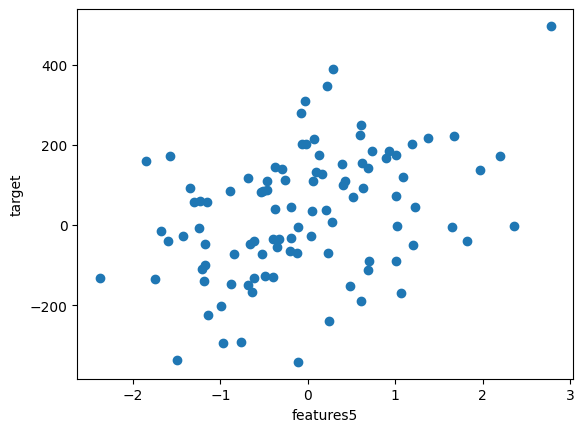

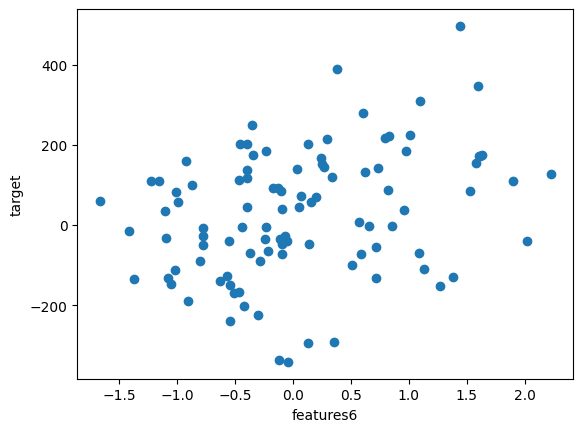

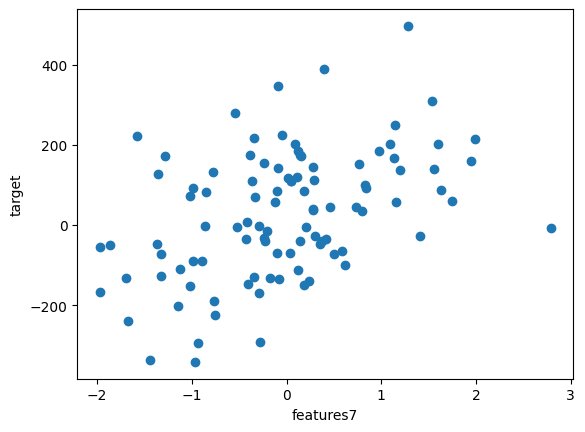

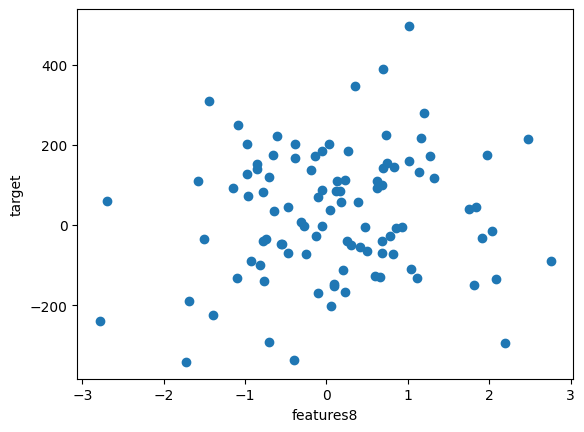

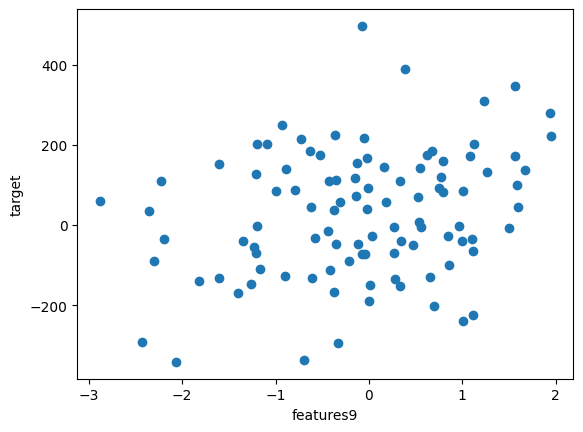

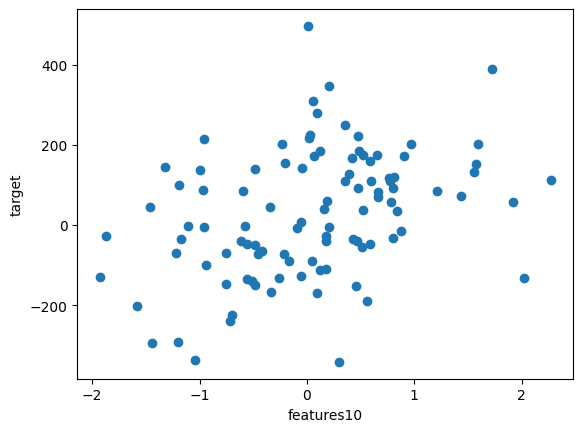

In [6]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.scatter(X[:,i],y)
  plt.xlabel("features"+str(i+1))
  plt.ylabel("target")
  plt.show()



# Your code here

[Note: Use this Link for help](https://www.tensorflow.org/tutorials/keras/regression)

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 10 \\
> Dense of shape 50 \\
> Dense of shape 10 \\
Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [42]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([
    tf.keras.Input(shape=(10,)),
    Dense(50,activation='relu'),
    Dense(10,activation='relu'),
    Dense(5,activation='relu'),
    Dense(1,activation='linear')
])
from tensorflow.keras.losses import MeanSquaredError

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0001,
        decay_steps=1000,
        decay_rate=0.9)),loss='MeanSquaredError')

model.summary()




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 50)                550       
                                                                 
 dense_17 (Dense)            (None, 10)                510       
                                                                 
 dense_18 (Dense)            (None, 5)                 55        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [43]:
history=model.fit(X_train,y_train,epochs=1000,validation_split=0.2)



Epoch 1/1000
2/2 [==============================] - 1s 147ms/step - loss: 24946.9121 - val_loss: 25759.1094
Epoch 2/1000
2/2 [==============================] - 0s 30ms/step - loss: 24939.3711 - val_loss: 25757.6133
Epoch 3/1000
2/2 [==============================] - 0s 46ms/step - loss: 24930.4336 - val_loss: 25754.7734
Epoch 4/1000
2/2 [==============================] - 0s 29ms/step - loss: 24919.5781 - val_loss: 25751.8418
Epoch 5/1000
2/2 [==============================] - 0s 28ms/step - loss: 24906.0039 - val_loss: 25746.9141
Epoch 6/1000
2/2 [==============================] - 0s 28ms/step - loss: 24890.0703 - val_loss: 25740.9375
Epoch 7/1000
2/2 [==============================] - 0s 30ms/step - loss: 24871.8164 - val_loss: 25733.0977
Epoch 8/1000
2/2 [==============================] - 0s 28ms/step - loss: 24843.9434 - val_loss: 25723.6133
Epoch 9/1000
2/2 [==============================] - 0s 29ms/step - loss: 24813.9727 - val_loss: 25711.3398
Epoch 10/1000
2/2 [=================

In [44]:
hist=pd.DataFrame(history.history)
hist['epoch']= history.epoch
hist.tail()

,loss,val_loss,epoch
995,0.186941,518.067322,995
996,0.180885,518.454468,996
997,0.186091,518.885742,997
998,0.178308,517.955505,998
999,0.228042,520.225830,999


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

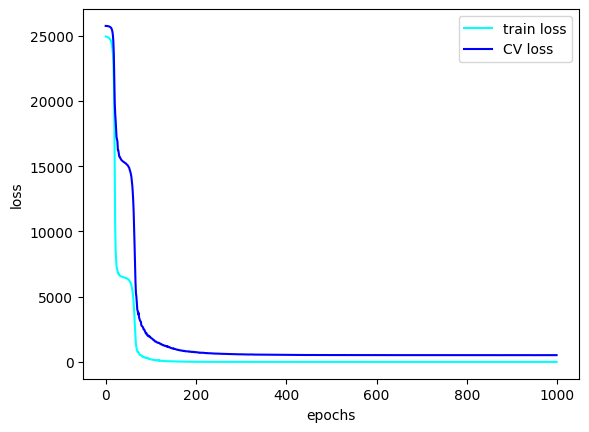

In [45]:
# Your code here
plt.plot(hist['epoch'],hist['loss'],color='cyan',label='train loss')
plt.plot(hist['epoch'],hist['val_loss'],color='blue',label='CV loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [47]:
from sklearn.metrics import r2_score

# Evaluate model on testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print R2 score
print(f"R2 score: {r2}")

1/1 [==============================] - 0s 22ms/step
R2 score: 0.9867484716901813
